<a href="https://colab.research.google.com/github/hanasgnt/PCVK_2024_14/blob/main/week3_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive

# Akses google drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Transformasi Linier Brightness** 🌞

Formula : *g(x, y) = f(x, y) + b*

*g(x, y)* adalah nilai pixel setelah transformasi

*f(x, y)* adalah nilai pixel asli

*b* adalah nilai brightness

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pylab as plt
import numpy as np
import copy

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai brightness : 25


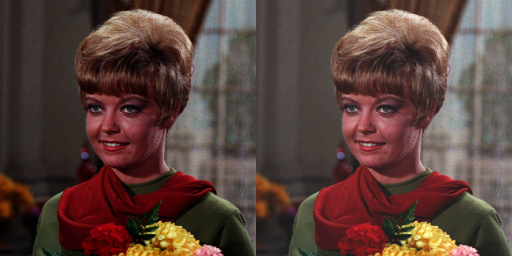

In [ ]:
# the original one
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai brightness : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_2024/image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# w/out loop
# brightness_image = cv.convertScaleAbs(original, beta = brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan banyaknya percobaan : 3
--------------------------------
Percobaan ke- 1
--------------------------------
Masukkan nilai brightness : 50


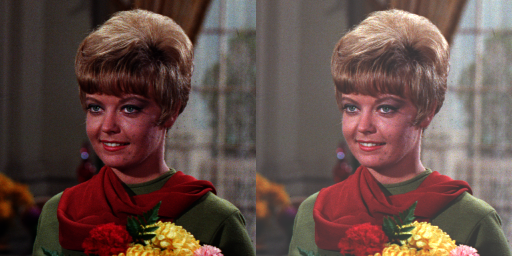


--------------------------------
Percobaan ke- 2
--------------------------------
Masukkan nilai brightness : 75


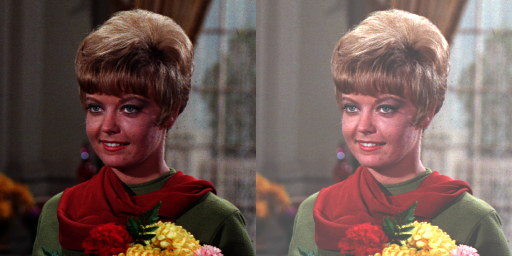


--------------------------------
Percobaan ke- 3
--------------------------------
Masukkan nilai brightness : 100


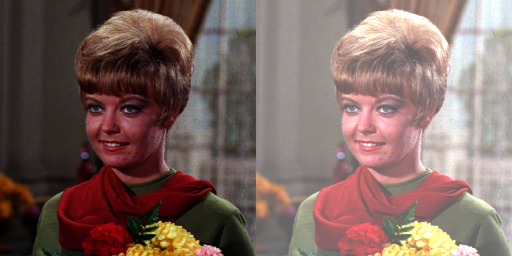


--------------------------------


In [ ]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

# modifikasi agar looping
percobaan = int(input('Masukkan banyaknya percobaan : '))
print('--------------------------------')

for i in range(percobaan):
  print('Percobaan ke-', i+1)
  print('--------------------------------')
  try:
    brightness = int(input('Masukkan nilai brightness : '))
  except ValueError:
    print('Error, not a number')

  original = cv.imread('/content/drive/MyDrive/PCVK_2024/image/female.tiff')
  brightness_image = np.zeros(original.shape, original.dtype)

  # akses per pixel
  for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
        brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

  # w/out loop
  # brightness_image = cv.convertScaleAbs(original, beta = brightness)

  final_frame = cv.hconcat((original, brightness_image))
  cv2_imshow(final_frame)
  print('\n--------------------------------')

## **Tugas Praktikum** 🏃🏻‍♂️

1.   Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori

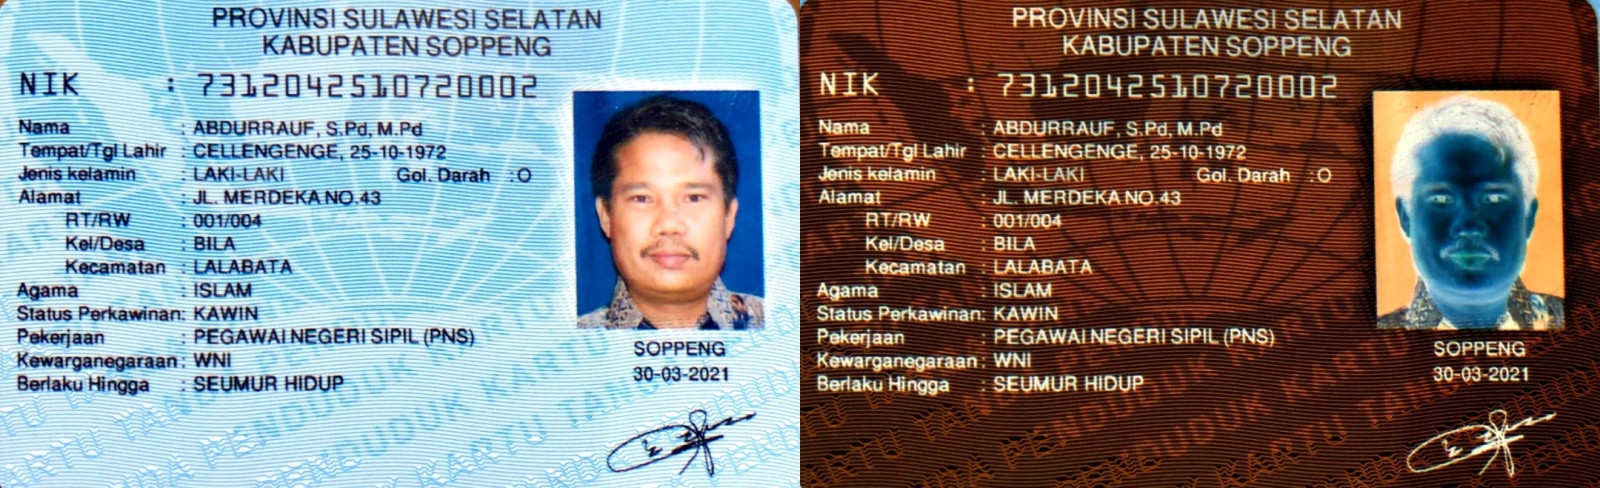

In [10]:
original = cv.imread('/content/drive/MyDrive/PCVK_2024/image/KTP.jpeg')
negative = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      negative[y, x, c] = 255 - original[y, x, c]

# w/out loop
# brightness_image = cv.convertScaleAbs(original, beta = brightness)

final_frame = cv.hconcat((original, negative))
cv2_imshow(final_frame)

2.   Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras



Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255] : 50
Masukkan nilai kontras [1.0 - 3.0] : 2


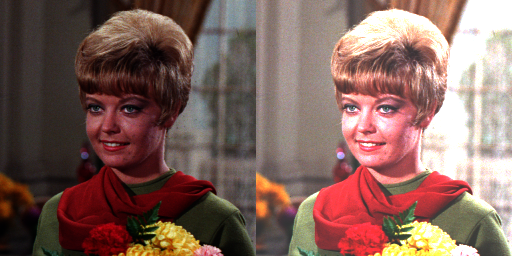

In [ ]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255] : '))
  contrass = int(input('Masukkan nilai kontras [1.0 - 3.0] : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_2024/image/female.tiff')
contrass_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrass_image[y, x, c] = np.clip(contrass * original[y, x, c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrass_image))
cv2_imshow(final_frame)

3.   Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log

Mengubah tingkat kecerahan citra dg transformasi log
--------------------------------
Masukkan nilai kecerahan : 50


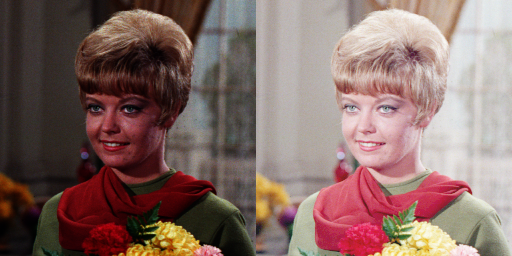

In [ ]:
print('Mengubah tingkat kecerahan citra dg transformasi log')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_2024/image/female.tiff')
c = 255 / np.log(1 + np.max(original))  # Mengatur konstanta c berdasarkan nilai maksimal citra

# Terapkan transformasi logaritmik pada setiap channel (R, G, B)
log_image = c * np.log(1 + original)

# convert log_image to uint8
log_image = log_image.astype(np.uint8)

final_frame = cv.hconcat((original, log_image))
cv2_imshow(final_frame)

4.   Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori,

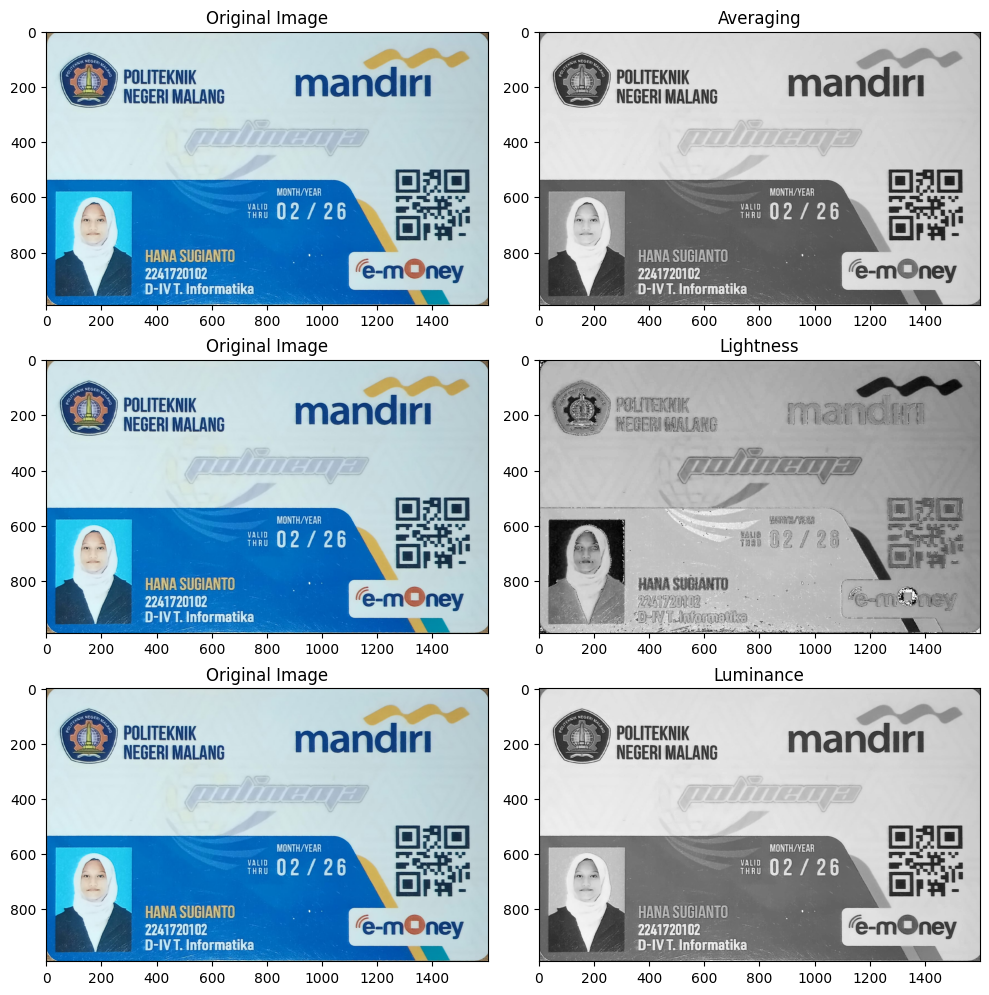

In [28]:
# Load the image
image = cv.imread('/content/drive/MyDrive/PCVK_2024/image/ktm_hanasugianto.jpg')
image_rgb = np.array(image)

# Averaging method
grayscale_avg = np.mean(image_rgb, axis=2)

# Lightness method
grayscale_lightness = (np.max(image_rgb, axis=2) + np.min(image_rgb, axis=2)) / 2

# Luminance method
grayscale_luminance = 0.2126 * image_rgb[:, :, 0] + 0.7152 * image_rgb[:, :, 1] + 0.0722 * image_rgb[:, :, 2]

# Plotting the original and processed images
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Original image
axs[0, 0].imshow(cv.cvtColor(image_rgb, cv.COLOR_BGR2RGB))
axs[0, 0].set_title("Original Image")

# Averaging
axs[0, 1].imshow(grayscale_avg, cmap='gray')
axs[0, 1].set_title("Averaging")

# Original image
axs[1, 0].imshow(cv.cvtColor(image_rgb, cv.COLOR_BGR2RGB))
axs[1, 0].set_title("Original Image")

# Lightness
axs[1, 1].imshow(grayscale_lightness, cmap='gray')
axs[1, 1].set_title("Lightness")

# Original image
axs[2, 0].imshow(cv.cvtColor(image_rgb, cv.COLOR_BGR2RGB))
axs[2, 0].set_title("Original Image")

# Luminance
axs[2, 1].imshow(grayscale_luminance, cmap='gray')
axs[2, 1].set_title("Luminance")

plt.tight_layout()
plt.show()

5.   Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale



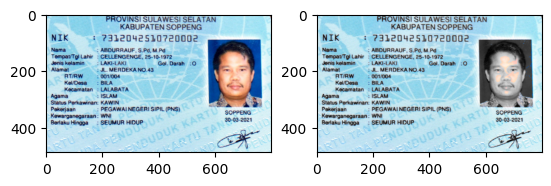

In [29]:
ktp = cv.imread('/content/drive/MyDrive/PCVK_2024/image/KTP.jpeg')

# Membuat masker untuk warna biru
ret, mask = cv.threshold(ktp[:, :, 0], 180, 255, cv.THRESH_BINARY)

# Membuat masker tiga saluran
mask3 = np.zeros_like(ktp)
mask3[:, :, 0] = mask  # Saluran biru
mask3[:, :, 1] = mask  # Saluran hijau
mask3[:, :, 2] = mask  # Saluran merah

# Mengambil bagian biru dari gambar asli
blue = cv.bitwise_and(ktp, mask3)

# Mengubah gambar menjadi skala abu-abu
gray = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)
img_gray = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Menggabungkan gambar skala abu-abu dan bagian biru
gray = cv.bitwise_and(img_gray, 255 - mask3)
out = gray + blue

# Menampilkan gambar asli dan hasilnya
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
plt.show()